In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import copy
import pickle as pickle
from tqdm import tqdm_notebook as tqdm


In [2]:
train = pd.read_csv('/home/dilraj/Desktop/mnist_train.csv', header=None)
train = train.values
train = train.T
print(train.shape)
print('')

test = pd.read_csv('/home/dilraj/Desktop/mnist_test.csv', header=None)
test = test.values
test = test.T
print(test.shape)


(785, 60000)

(785, 10000)


4
(784,)
(28, 28)


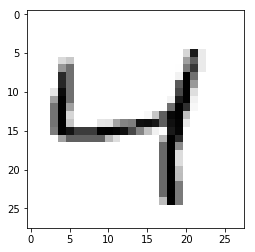

0
(784,)
(28, 28)


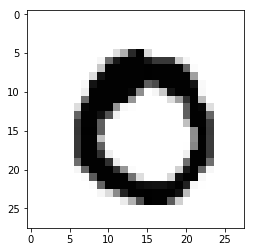

In [3]:
#plot 3rd and 57th training example
single = train[:, 2]
print(single[0])
single = single[1:]
print(single.shape)
single_image = single.reshape(28, 28)
print(single_image.shape)
plt.imshow(single_image, cmap='Greys')
plt.show()

single = train[:, 56]
print(single[0])
single = single[1:]
print(single.shape)
single_image = single.reshape(28, 28)
print(single_image.shape)
plt.imshow(single_image, cmap='Greys')
plt.show()


In [4]:
#separate labels and data
train_labels = train[0]
train_labels = train_labels.astype(np.float32)
m = train_labels.shape[0]
print(train_labels.reshape(1, train_labels.shape[0]))
temp = tf.constant(10, name='temp')
train_labels_temp = tf.one_hot(train_labels, temp, axis=0)
session = tf.Session()
train_labels = session.run(train_labels_temp)
session.close()
print(train_labels)
print(train_labels.shape)
print('')
train_data = train[1:, :]
train_data = train_data.astype(np.float32)
print(train_data)
print(train_data.shape)
print('')

test_labels = test[0]
train_labels = train_labels.astype(np.float32)
print(test_labels.reshape(1, test_labels.shape[0]))
temp = tf.constant(10, name='temp')
test_labels_temp = tf.one_hot(test_labels, temp, axis=0)
session = tf.Session()
test_labels = session.run(test_labels_temp)
session.close()
print(test_labels)
print(test_labels.shape)
print('')
test_data = test[1:, :]
test_data = test_data.astype(np.float32)
print(test_data)
print(test_data.shape)


[[ 5.  0.  4. ...,  5.  6.  8.]]
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(10, 60000)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(784, 60000)

[[7 2 1 ..., 4 5 6]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(10, 10000)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(784, 10000)


In [5]:
#define no of layers and no of neurons in each layer
layer_dimensions = [784, 16, 16, 16, 10]

#initialize parameters
def initialize_parameters():
    parameters = {}
    for i in range(1, len(layer_dimensions)):
        parameters['w' + str(i)] = tf.multiply(tf.Variable(tf.random_normal((layer_dimensions[i], layer_dimensions[i-1]))), 0.01)#*0.01#*math.sqrt(2/layer_dimensions[i-1])
        parameters['b' + str(i)] = tf.Variable(tf.zeros((layer_dimensions[i], 1)))
    return parameters


In [6]:
#initialize placeholders for input and output
x = tf.placeholder(tf.float32, [784, None])
y = tf.placeholder(tf.float32, [10, None])
iterations = 1500
learning_rate = 0.01


In [7]:
#define model
parameters = initialize_parameters()
with tf.device('/gpu:0'):
    out = {}
    out[str(1)] = tf.nn.relu(tf.add(tf.matmul(parameters['w1'], x), parameters['b1']))
    for i in range(2, len(layer_dimensions)-1):
        out[str(i)] = tf.nn.relu(tf.add(tf.matmul(parameters['w' + str(i)], out[str(i-1)]), parameters['b' + str(i)]))
    out[str(len(layer_dimensions)-1)] = tf.add(tf.matmul(parameters['w' + str(len(layer_dimensions)-1)], out[str(len(layer_dimensions)-2)]), parameters['b' + str(len(layer_dimensions)-1)])
    labels_out = out[str(len(layer_dimensions)-1)]
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=tf.transpose(labels_out), labels=tf.transpose(y)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_step = optimizer.minimize(loss)


HBox(children=(IntProgress(value=0, max=1500), HTML(value='')))

iteration:    0 | cost:  2.302664041519165
iteration:  100 | cost:  2.001591444015503
iteration:  200 | cost:  1.522290349006653
iteration:  300 | cost:  1.061438441276550
iteration:  400 | cost:  0.711798250675201
iteration:  500 | cost:  0.572832167148590
iteration:  600 | cost:  0.488517254590988
iteration:  700 | cost:  0.400084823369980
iteration:  800 | cost:  0.321962773799896
iteration:  900 | cost:  0.283067643642426
iteration: 1000 | cost:  0.256952434778214
iteration: 1100 | cost:  0.237421259284019
iteration: 1200 | cost:  0.221632018685341
iteration: 1300 | cost:  0.208213284611702
iteration: 1400 | cost:  0.196260944008827



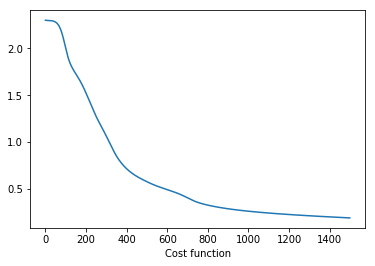

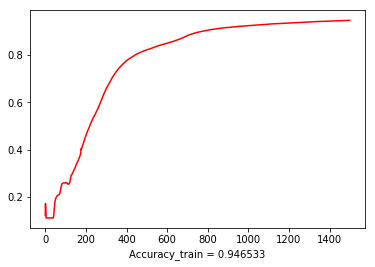

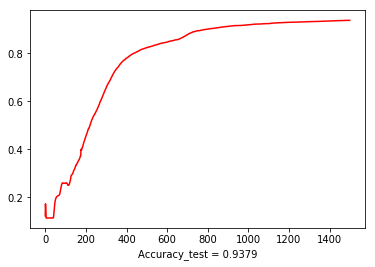

In [8]:
init = tf.global_variables_initializer()
costs = []
pbar = tqdm(total=iterations)
accuracy_train = []
accuracy_test = []
device_info = tf.ConfigProto(log_device_placement=True)
with tf.device('/gpu:0'):
    with tf.Session(config=device_info) as sess:
        sess.run(init)
        for epoch in range(iterations):
            _, cost = sess.run([train_step, loss], feed_dict={x: train_data, y: train_labels})
            costs.append(cost)
            labels_softmax = tf.nn.softmax(labels_out, dim=0)
            correct_prediction = tf.equal(tf.argmax(labels_softmax, 0), tf.argmax(y, 0))
            acc = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            temp = acc.eval({x: train_data, y: train_labels})
            accuracy_train.append(temp)
            temp = acc.eval({x: test_data, y: test_labels})
            accuracy_test.append(temp)
            if(epoch%100==0):
                print("iteration: %4d | cost: %18.15f" % (epoch, cost))
            pbar.update(1)
        pbar.close()
        plt.plot(np.squeeze(costs))
        plt.xlabel('Cost function')
        plt.show()
        plt.plot(np.squeeze(accuracy_train), color='r')
        plt.xlabel('Accuracy_train = ' + str(accuracy_train[-1]))
        plt.show()
        plt.plot(np.squeeze(accuracy_test), color='r')
        plt.xlabel('Accuracy_test = ' + str(accuracy_test[-1]))
        plt.show()
